In [1]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import time, datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

%matplotlib inline

In [85]:
df2= pd.read_csv("berlinerstraße1519.csv", low_memory=False, infer_datetime_format=True, usecols= ["Datum ", "NO2 (µg/m³)", "Temperatur (°C)", "Globalstrahlung (W/m²)","Windrichtung (°)", "Windgeschwindigkeit (m/s)" ])

In [86]:
df2

,Datum,NO2 (µg/m³),Temperatur (°C),Globalstrahlung (W/m²),Windrichtung (°),Windgeschwindigkeit (m/s)
0,1/1/2015 0:30,38.5,2.0,1.0,151.0,0.4
1,1/1/2015 1:00,37.2,2.0,1.0,157.0,0.4
2,1/1/2015 1:30,37.0,1.9,1.0,152.0,0.9
3,1/1/2015 2:00,42.8,1.7,1.0,156.0,1.3
4,1/1/2015 2:30,38.0,1.8,1.0,142.0,0.8
...,...,...,...,...,...,...
87789,12/31/2019 22:00,35.5,2.6,8.0,330.0,0.8
87790,12/31/2019 22:30,36.0,2.6,8.0,310.0,1.1
87791,12/31/2019 23:00,35.1,2.5,8.0,321.0,1.0
87792,12/31/2019 23:30,35.1,2.7,8.0,334.0,1.0


In [74]:
df = pd.read_csv("berlinerstraße1720.csv", encoding="ISO-8859-1", low_memory=False, infer_datetime_format=True, usecols= ["Datum ", "NO2 (µg/m³)", "Temperatur (°C)", "Globalstrahlung (W/m²)","Windrichtung (°)", "Windgeschwindigkeit (m/s)" ])

In [75]:
df

,Datum,NO2 (µg/m³),Temperatur (°C),Globalstrahlung (W/m²),Windrichtung (°),Windgeschwindigkeit (m/s)
0,1/1/2017 0:30,NaN,NaN,NaN,NaN,NaN
1,1/1/2017 1:00,NaN,NaN,NaN,NaN,NaN
2,1/1/2017 1:30,NaN,NaN,NaN,NaN,NaN
3,1/1/2017 2:00,NaN,NaN,NaN,NaN,NaN
4,1/1/2017 2:30,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
70124,"Thu, 31/12/2020 22:00",19.5,2.9,8.0,153.0,1.2
70125,"Thu, 31/12/2020 22:30",18.9,3.1,8.0,150.0,1.1
70126,"Thu, 31/12/2020 23:00",22.1,3.1,8.0,159.0,0.9
70127,"Thu, 31/12/2020 23:30",22.4,3.2,8.0,151.0,0.8


In [4]:
my_date_range = pd.date_range('01-01-2017 00:00:00', periods = 70130, freq="30min", closed = "right")
df = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df["NO2 (µg/m³)"], "Temperatur (°C)": df["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df["Windgeschwindigkeit (m/s)"], "Windrichtung (°)":df["Windrichtung (°)"]}) 

df["day"] = df["Time"].dt.date
df["month"]=df["Time"].dt.month
df["hour"] = df["Time"].dt.time
df['date'] = df['Time'].dt.strftime('%m-%d %H:%M-%S')


In [5]:
df

,Time,NO2 (µg/m³),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),day,month,hour,date
0,2017-01-01 00:30:00,NaN,NaN,NaN,NaN,2017-01-01,1,00:30:00,01-01 00:30-00
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,2017-01-01,1,01:00:00,01-01 01:00-00
2,2017-01-01 01:30:00,NaN,NaN,NaN,NaN,2017-01-01,1,01:30:00,01-01 01:30-00
3,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,2017-01-01,1,02:00:00,01-01 02:00-00
4,2017-01-01 02:30:00,NaN,NaN,NaN,NaN,2017-01-01,1,02:30:00,01-01 02:30-00
...,...,...,...,...,...,...,...,...,...
70124,2020-12-31 22:30:00,19.5,2.9,1.2,153.0,2020-12-31,12,22:30:00,12-31 22:30-00
70125,2020-12-31 23:00:00,18.9,3.1,1.1,150.0,2020-12-31,12,23:00:00,12-31 23:00-00
70126,2020-12-31 23:30:00,22.1,3.1,0.9,159.0,2020-12-31,12,23:30:00,12-31 23:30-00
70127,2021-01-01 00:00:00,22.4,3.2,0.8,151.0,2021-01-01,1,00:00:00,01-01 00:00-00


In [6]:
df_hourly=df.resample('H', on='Time').mean()#,how='mean')



In [7]:
my_date_range = pd.date_range('01-01-2017 00:00:00', periods = 35066, freq="H", closed = "right")
df_hourly = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df_hourly["NO2 (µg/m³)"], "Temperatur (°C)": df_hourly["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df_hourly["Windgeschwindigkeit (m/s)"], "Windrichtung (°)":df_hourly["Windrichtung (°)"]}) 

df_hourly["day"] = df_hourly["Time"].dt.date
df_hourly["month"]=df_hourly["Time"].dt.month
df_hourly["hour"] = df_hourly["Time"].dt.time
df_hourly['date'] = df_hourly['Time'].dt.strftime('%m-%d %H:%M-%S')

In [8]:
df_hourly

,Time,NO2 (µg/m³),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),day,month,hour,date
Time,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,2017-01-01,1,01:00:00,01-01 01:00-00
2017-01-01 01:00:00,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,2017-01-01,1,02:00:00,01-01 02:00-00
2017-01-01 02:00:00,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,2017-01-01,1,03:00:00,01-01 03:00-00
2017-01-01 03:00:00,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,2017-01-01,1,04:00:00,01-01 04:00-00
2017-01-01 04:00:00,2017-01-01 05:00:00,NaN,NaN,NaN,NaN,2017-01-01,1,05:00:00,01-01 05:00-00
...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00:00,2020-12-31 21:00:00,22.75,3.25,1.35,149.0,2020-12-31,12,21:00:00,12-31 21:00-00
2020-12-31 21:00:00,2020-12-31 22:00:00,24.35,2.95,1.10,138.0,2020-12-31,12,22:00:00,12-31 22:00-00
2020-12-31 22:00:00,2020-12-31 23:00:00,20.30,2.85,1.25,146.0,2020-12-31,12,23:00:00,12-31 23:00-00


In [9]:
grouped_year= df_hourly.groupby("date")
df_year= grouped_year.mean()

In [10]:
df_year

,NO2 (µg/m³),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),month
date,,,,,
01-01 00:00-00,23.500000,6.362500,1.275000,200.000000,1
01-01 01:00-00,23.700000,6.375000,1.050000,210.750000,1
01-01 02:00-00,23.266667,6.916667,1.116667,225.833333,1
01-01 03:00-00,20.666667,6.083333,1.083333,174.500000,1
01-01 04:00-00,19.466667,5.766667,1.016667,168.333333,1
...,...,...,...,...,...
12-31 19:00-00,29.000000,6.400000,1.100000,196.750000,12
12-31 20:00-00,31.312500,6.350000,1.312500,193.375000,12
12-31 21:00-00,26.300000,6.350000,1.437500,192.375000,12


In [11]:
my_date_range = pd.date_range('2019-12-31 23:00:00', periods = 8785, freq="H", closed = "right")
df_sep = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df_year["NO2 (µg/m³)"], "Temperatur (°C)": df_year["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df_year["Windgeschwindigkeit (m/s)"], "Windrichtung (°)":df_year["Windrichtung (°)"]}) 
df_sep["hour"] = df_sep["Time"].dt.time
df_sep["uhrzeit"] = df_sep["Time"].dt.hour
#df_sep['Time'].dt.strftime('%H:%M:%S')
#df_sep["uhrzeit"]=df_sep['Time'].dt.strftime('%H:%M:%S')

In [12]:
df_sep

,Time,NO2 (µg/m³),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),hour,uhrzeit
date,,,,,,,
01-01 00:00-00,2020-01-01 00:00:00,23.500000,6.362500,1.275000,200.000000,00:00:00,0
01-01 01:00-00,2020-01-01 01:00:00,23.700000,6.375000,1.050000,210.750000,01:00:00,1
01-01 02:00-00,2020-01-01 02:00:00,23.266667,6.916667,1.116667,225.833333,02:00:00,2
01-01 03:00-00,2020-01-01 03:00:00,20.666667,6.083333,1.083333,174.500000,03:00:00,3
01-01 04:00-00,2020-01-01 04:00:00,19.466667,5.766667,1.016667,168.333333,04:00:00,4
...,...,...,...,...,...,...,...
12-31 19:00-00,2020-12-31 19:00:00,29.000000,6.400000,1.100000,196.750000,19:00:00,19
12-31 20:00-00,2020-12-31 20:00:00,31.312500,6.350000,1.312500,193.375000,20:00:00,20
12-31 21:00-00,2020-12-31 21:00:00,26.300000,6.350000,1.437500,192.375000,21:00:00,21


In [13]:
# aufteilen in 4 seasons

# spring
mask_spring = (df_sep['Time'] >= '2020-03-1 00:00:00') & (df_sep['Time'] <= '2020-05-31 23:30:00')
df_spring=df_sep.loc[mask_spring]
df_spring.to_csv("spring.csv")
# summer
mask_summer = (df_sep['Time'] >= '2020-06-1 00:00:00') & (df_sep['Time'] <= '2020-08-31 23:30:00')
df_summer=df_sep.loc[mask_summer]
# autumn
mask_autumn = (df_sep['Time'] >= '2020-09-1 00:00:00') & (df_sep['Time'] <= '2020-11-30 23:30:00')
df_autumn=df_sep.loc[mask_autumn]
# winter
mask_winter1 = (df_sep['Time'] >= '2020-12-1 00:00:00')& (df_sep['Time'] <= '2020-12-31 23:30:00') 
mask_winter2= (df_sep['Time']>='2020-01-1 00:00:00') & (df_sep['Time'] <= '2020-02-28 23:30:00')
df_winter1=df_sep.loc[mask_winter1]
df_winter2=df_sep.loc[mask_winter2]
df_winter= df_winter2.append([df_winter1])

In [14]:
#df_spring["no2"]=np.where(df_spring["NO2 (µg/m³)"]<= 25., "0-25", ">25")

In [15]:
#grouped_hour= df_spring.groupby("60min")["date"]
#df_spring_new= grouped_hour.mean()

In [16]:
#df_spring = pd.read_csv("spring.csv")#, encoding="ISO-8859-1", low_memory=False, infer_datetime_format=True, usecols= ["Datum ", "NO2 (µg/m³)", "Temperatur (°C)", "Globalstrahlung (W/m²)","Windrichtung (°)", "Windgeschwindigkeit (m/s)" ])

In [17]:
#df_spring

In [18]:
conds=[]
time={0:'00:00:00',1:'01:00:00', 2:'02:00:00', 3:'03:00:00', 4:'04:00:00', 5:'05:00:00', 6:'06:00:00', 7:'07:00:00', 8:'09:00:00', 9:'09:00:00', 10:'10:00:00', 11:'11:00:00', 12:'12:00:00', 13:'13:00:00', 14:'14:00:00', 15:'15:00:00', 16:'16:00:00', 17:'17:00:00', 18:'18:00:00', 19:'19:00:00', 20:'20:00:00', 21:'21:00:00', 22:'22:00:00', 23:'23:00:00', 24:'24:00:00'}

for i in range(0,24):
    cond=(df_spring['Time'].dt.strftime('%H:%M:%S') == time[i])
    conds.append(cond)
    
spring_hour=[]

for i in range(0,24):
    mask_hour = conds[i]
    df_spring_hour = df_spring.loc[mask_hour] 
    spring_hour.append(df_spring_hour)
    


<AxesSubplot:xlabel='Windgeschwindigkeit (m/s)', ylabel='NO2 (µg/m³)'>

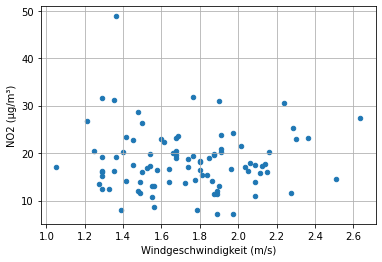

In [19]:
spring_hour[18].plot.scatter(grid=True, y="NO2 (µg/m³)", x= "Windgeschwindigkeit (m/s)")

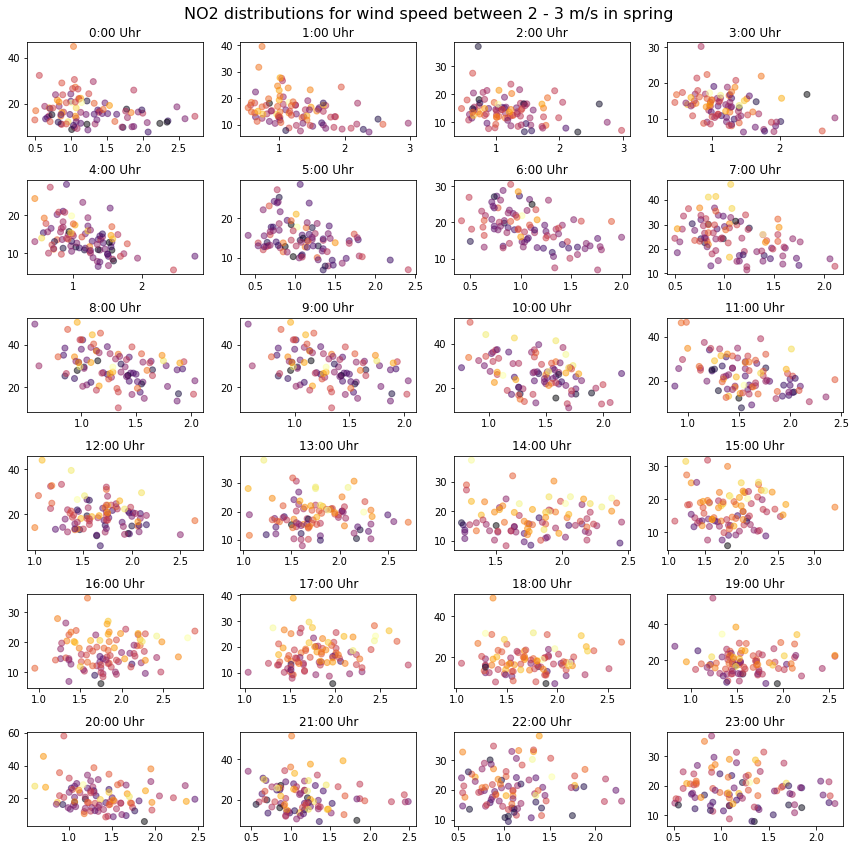

In [20]:
nrows = 6
ncols = 4

fig, axes=plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,12))
fig.suptitle("NO2 distributions for wind speed between 2 - 3 m/s in spring", fontsize=16)
#fig, axes =plt.xlim([0,5])
#fig, axes=plt.autoscale(enable=True, axis='y')

hour = 0

for i in range(nrows):
    for j in range(ncols):
        axes[i, j].scatter(y=spring_hour[hour]["NO2 (µg/m³)"],x=spring_hour[hour]["Windgeschwindigkeit (m/s)"],c= spring_hour[hour]["Windrichtung (°)"], cmap= "inferno", alpha=0.5)
        axes[i, j].set_title(f"{hour}:00 Uhr")
       # axes[i, j].axis("off")
        
        
    

        hour += 1
fig.tight_layout()
#fig.colorbar(mappable=None)


In [56]:
## für jede Stunde

#Windgeschwindigkeit <2,5 m/s
wind_spring=[]

laenge_wind_spring=[]

for i in range(0,24):
    #df_speed=(spring_hour[i]["Windgeschwindigkeit (m/s)"]>=2.)
    df_speed=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=2.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=1.)
    #df_speed=(spring_hour[i]["Windgeschwindigkeit (m/s)"]<=1.) & (spring_hour[i]["Windgeschwindigkeit (m/s)"]>=0.)
            
    df_low_speed_spring = spring_hour[i].loc[df_speed]
    wind_spring.append(df_low_speed_spring)
for i in range(0,24):
    laenge_wind_spring.append(len(wind_spring[i]))

#laenge_no2_spring=[]
#no2_spring=[]
#no2_summer=[]
#no2_autumn=[]
#no2_winter=[]


#hohe NO2 Konzentrationen
#for i in range(0,24):
#    df_mask_no2=wind_spring[i]["NO2 (µg/m³)"]>=40
    #df_mask_no2=wind_spring[i]["NO2 (µg/m³)"]>=40
    #df_mask_no2=wind_spring[i]["NO2 (µg/m³)"]>=40
#    df_high_no2 =wind_spring[i].loc[df_mask_no2]
#    no2_spring.append(df_high_no2)
#    laenge_no2_spring.append(len(no2_spring))
#df_high_no2.shape
#df_low_speed_spring.shape
lows=[]
laengelow=[]
mediums=[]
laengemedium=[]
highs=[]
laengehigh=[]

for i in range (0,24):
    low = wind_spring[i].loc[wind_spring[i]["NO2 (µg/m³)"].between(0, 19.99999)]
    lows.append(low)
    laengelow.append(len(low))
    medium =wind_spring[i].loc[wind_spring[i]["NO2 (µg/m³)"].between(20, 39.99999)]
    mediums.append(medium)
    laengemedium.append(len(medium))
    high = wind_spring[i].loc[wind_spring[i]["NO2 (µg/m³)"].between(40, 500)]
    highs.append(high)
    laengehigh.append(len(high))
    
    
    
    
    
prozente_low=[]
prozente_medium=[]
prozente_high=[]

anzahl_no2s_low=[]
anzahl_no2s_medium=[]
anzahl_no2s_high=[]


for i in range (0, 24):
    anzahl_ges= laenge_wind_spring[i]
    anzahl_no2_low=laengelow[i]
    anzahl_no2s_low.append(anzahl_no2_low)

    
    try:
        prozent_low=anzahl_no2s_low[i]/(anzahl_ges/100)
        prozente_low.append(prozent_low)
    except ZeroDivisionError:
        prozente_low.append(0.0) 
        
for i in range (0, 24):
    anzahl_ges= laenge_wind_spring[i]
    anzahl_no2_medium=laengemedium[i]
    anzahl_no2s_medium.append(anzahl_no2_medium)
    try:
    
        prozent_medium=anzahl_no2s_medium[i]/(anzahl_ges/100)
        prozente_medium.append(prozent_medium)
    
    except ZeroDivisionError:
        prozente_medium.append(0.0)

for i in range (0, 24):
    anzahl_ges=laenge_wind_spring[i]
    anzahl_no2_high=laengehigh[i]
    anzahl_no2s_high.append(anzahl_no2_high)
    
    try:
        prozent_high=anzahl_no2s_high[i]/(anzahl_ges/100)
        prozente_high.append(prozent_high)
    except ZeroDivisionError:
        prozente_high.append(0.0)
    
    
#for i in range (0,24):
#    anzahl_no2=len(no2_spring[i].index)
#    anzahl_no2s.append(anzahl_no2)
#    anzahl_ges=len(wind_spring[i].index)

    
#    try:
#        prozent= anzahl_no2/(anzahl_ges/100)
#        prozente.append(prozent)
#    except ZeroDivisionError:
#        prozente.append(0.0)

In [57]:
len(prozente_low)

24

In [58]:
wind_spring[11]

,Time,NO2 (µg/m³),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),hour,uhrzeit
date,,,,,,,
03-01 11:00-00,2020-03-01 11:00:00,19.9625,4.8625,1.8000,179.875,11:00:00,11
03-02 11:00-00,2020-03-02 11:00:00,20.9375,5.3000,2.0000,178.250,11:00:00,11
03-03 11:00-00,2020-03-03 11:00:00,22.3500,6.4125,1.5625,177.625,11:00:00,11
03-04 11:00-00,2020-03-04 11:00:00,32.1625,7.5125,1.7625,245.750,11:00:00,11
03-06 11:00-00,2020-03-06 11:00:00,28.8125,7.3625,1.5625,189.875,11:00:00,11
...,...,...,...,...,...,...,...
05-27 11:00-00,2020-05-27 11:00:00,9.2875,22.3500,1.6250,179.500,11:00:00,11
05-28 11:00-00,2020-05-28 11:00:00,19.2375,21.7125,1.6625,220.375,11:00:00,11
05-29 11:00-00,2020-05-29 11:00:00,22.9125,21.4000,1.4000,203.875,11:00:00,11


In [59]:
lows[11]

,Time,NO2 (µg/m³),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),hour,uhrzeit
date,,,,,,,
03-01 11:00-00,2020-03-01 11:00:00,19.962500,4.8625,1.8000,179.875,11:00:00,11
03-13 11:00-00,2020-03-13 11:00:00,18.275000,7.8250,1.6000,179.875,11:00:00,11
03-18 11:00-00,2020-03-18 11:00:00,18.187500,5.8000,1.9375,164.750,11:00:00,11
03-24 11:00-00,2020-03-24 11:00:00,13.237500,7.8625,1.9250,169.875,11:00:00,11
03-29 11:00-00,2020-03-29 11:00:00,17.950000,10.7875,1.6625,215.375,11:00:00,11
03-30 11:00-00,2020-03-30 11:00:00,12.312500,11.2875,1.5000,133.000,11:00:00,11
04-06 11:00-00,2020-04-06 11:00:00,18.137500,11.4250,2.0000,173.375,11:00:00,11
04-14 11:00-00,2020-04-14 11:00:00,16.412500,10.2625,1.3875,187.625,11:00:00,11
04-18 11:00-00,2020-04-18 11:00:00,17.500000,14.9750,1.6250,226.750,11:00:00,11


In [60]:
#Tabelle mit Prozenten:

my_date_range = pd.date_range('2019-12-31 23:00:00', periods = 25, freq="H", closed = "right")
df_tab = pd.DataFrame({'Time': my_date_range, 'Wahrscheinlichkeit low': prozente_low, "Wahrscheinlichkeit medium": prozente_medium, "Wahrscheinlichkeit high": prozente_high}) 
df_tab["uhrzeit"] = df_tab["Time"].dt.hour
df_tab["sum"]= df_tab["Wahrscheinlichkeit low"]+df_tab["Wahrscheinlichkeit medium"]+df_tab["Wahrscheinlichkeit high"]

In [61]:
df_tab

,Time,Wahrscheinlichkeit low,Wahrscheinlichkeit medium,Wahrscheinlichkeit high,uhrzeit,sum
0,2020-01-01 00:00:00,65.454545,32.727273,1.818182,0,100.0
1,2020-01-01 01:00:00,83.928571,16.071429,0.000000,1,100.0
2,2020-01-01 02:00:00,91.071429,8.928571,0.000000,2,100.0
3,2020-01-01 03:00:00,96.428571,3.571429,0.000000,3,100.0
4,2020-01-01 04:00:00,96.226415,3.773585,0.000000,4,100.0
5,2020-01-01 05:00:00,94.230769,5.769231,0.000000,5,100.0
6,2020-01-01 06:00:00,79.591837,20.408163,0.000000,6,100.0
7,2020-01-01 07:00:00,39.130435,58.695652,2.173913,7,100.0
8,2020-01-01 08:00:00,13.698630,79.452055,6.849315,8,100.0
9,2020-01-01 09:00:00,13.698630,79.452055,6.849315,9,100.0


In [62]:
## Windgeschwindigkeit 0-1:

#wind_spring[0]
#wind_spring[0].plot()


## no2 über 40
#no2_spring[0]

#anzahl_no2s

Text(0.5, 1.0, '')

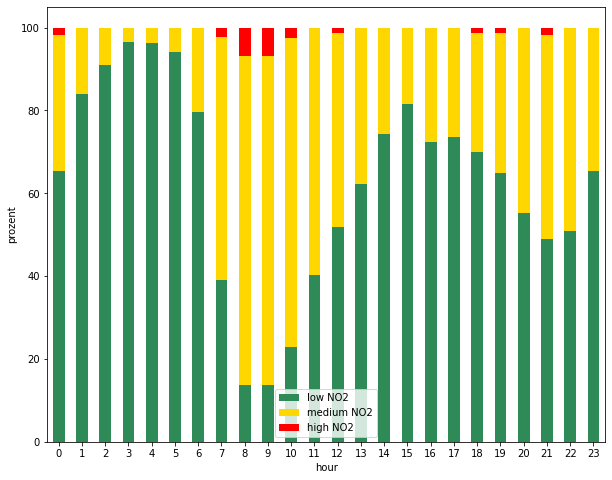

In [69]:
wahrscheinlichkeit_low=np.array(df_tab["Wahrscheinlichkeit low"])
wahrscheinlichkeit_medium=np.array(df_tab["Wahrscheinlichkeit medium"])
wahrscheinlichkeit_high=np.array(df_tab["Wahrscheinlichkeit high"])

dates=np.array(df_tab["uhrzeit"])
#dates = pd.date_range('1/1/2000 00:00:00', periods=24)
df_bar= pd.DataFrame({'low NO2': wahrscheinlichkeit_low,'medium NO2': wahrscheinlichkeit_medium,'high NO2': wahrscheinlichkeit_high, }, index=dates)
ax=df_bar.plot.bar(rot=0, stacked=True, figsize=(10,8),  color={"low NO2": "seagreen", "medium NO2": "gold", "high NO2":"red"})
#ax=df_bar.plot.bar(rot=0, figsize=(14,10), color={"low NO2": "seagreen", "medium NO2": "gold", "high NO2":"red"})
#df_tab.plot.bar(x="Time", y=["Wahrscheinlichkeit low", "Wahrscheinlichkeit medium", "Wahrscheinlichkeit high"])
ax.set_ylabel('prozent')
ax.set_xlabel('hour')
ax.set_title('')
#ax.set_title('')
#ax.set_title('')
#plt.savefig("bar_spring_0-1ms")
#plt.savefig("bar_spring_1-2ms")
#plt.savefig("bar_spring_2<ms")


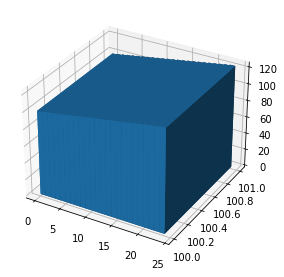

In [64]:



fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(121, projection='3d')
x=dates
y= (wahrscheinlichkeit_low+wahrscheinlichkeit_medium+wahrscheinlichkeit_high)
top=x+y
bottom=np.zeros_like(top)
width=depth=1
ax.bar3d(x, y ,bottom, width, depth, top,)#,  color={"Wahrscheinlichkeit low": "green", "Wahrscheinlichkeit medium": "orange", "Wahrscheinlichkeit high":"red"}, shade=True)

In [65]:
#stunden=np.array(list(range(0,24)))

In [66]:
#stunden
#spring_hour[4]

In [67]:
lows=[]
mediums=[]
highs=[]

for i in range (0,24):
    low = wind_spring[i].loc[wind_spring[i]["NO2 (µg/m³)"].between(0, 20)]
    lows.append(low)
    medium =wind_spring[i].loc[wind_spring[i]["NO2 (µg/m³)"].between(20, 40)]
    mediums.append(medium)
    high = wind_spring[i].loc[wind_spring[i]["NO2 (µg/m³)"].between(40, 200)]
    highs.append(high)

In [31]:
#wind_spring[0]["NO2 (µg/m³)"].plot.hist()

In [32]:
#high["NO2 (µg/m³)"].plot.hist()

In [33]:


#low["NO2 (µg/m³)"].plot.hist()
#medium["NO2 (µg/m³)"].plot.hist()
#high["NO2 (µg/m³)"].plot.hist()

In [34]:
#def hourplot(hour):
#    ax=lows[hour]["NO2 (µg/m³)"].plot.hist()
#    mediums[hour]["NO2 (µg/m³)"].plot.hist(ax=ax)
#    highs[hour]["NO2 (µg/m³)"].plot.hist(ax=ax)

AttributeError: 'function' object has no attribute 'xlim'

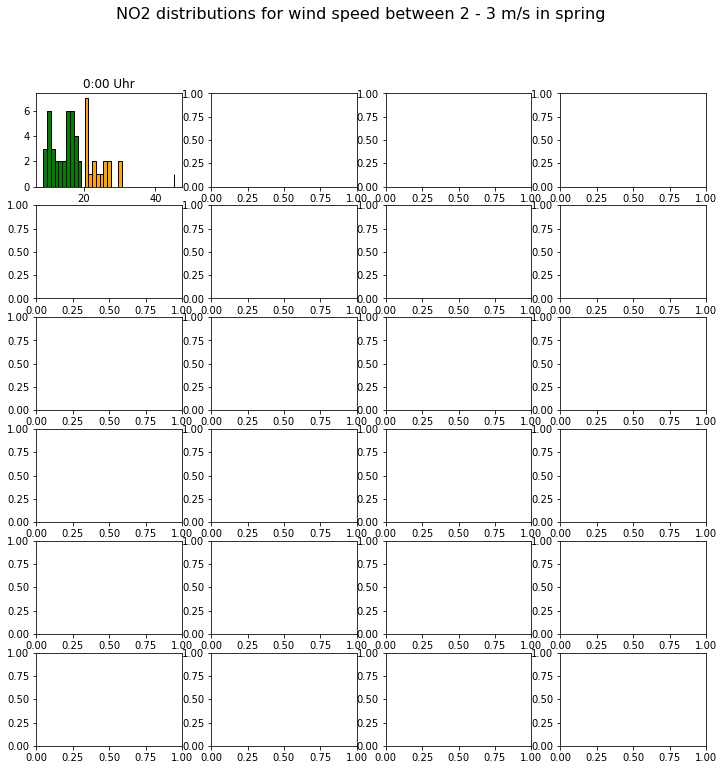

In [72]:
nrows = 6
ncols = 4

fig, axes=plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,12))
fig.suptitle("NO2 distributions for wind speed between 2 - 3 m/s in spring", fontsize=16)
hour = 0
for i in range(nrows):
    for j in range(ncols):
        
        axes[i, j].hist(lows[hour]["NO2 (µg/m³)"], edgecolor="black", color="green", label="0-20")
        axes[i, j].hist(mediums[hour]["NO2 (µg/m³)"], edgecolor="black", color="orange", label="20-40")
        axes[i, j].hist(highs[hour]["NO2 (µg/m³)"], edgecolor="black", color="red", label=">40")
        axes[i, j].set_title(f"{hour}:00 Uhr")
        #axes[i, j]. x achse gleicher Abstand
        #axes[i, j].axis("off")
        hour += 1
fig.tight_layout()       
      #  plt.savefig("hist2_3_spring")

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=
y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()



SyntaxError: invalid syntax (<ipython-input-36-ea6e26cea30a>, line 3)